# Exploratory Data Analysis (EDA)



What is data exploration?

Data exploration is combination of techniques such as 
summary statistics - mean, median, variance, count etc
and visualization - graphical representation of data

Some insight (interesting things about data/ discrepancies in data) can be easily measured by numerical means and can be spotted using graphical representations. 

## Bussiness Question

##### Suppose your goal is to build a model to predict which of your customers don't have health insurance. You have collected dataset of customers whose health insurance status you know. You have also identified some customer properties that you belive help predict the probability of insurance coverage: age, employement status, income, information about residence and vehicles, and so on.

## Preparations


For the preparations lets first import the necessary libraries and load the files needed for our EDA

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format


/bin/bash: jt: command not found


In [2]:
df = pd.read_csv('./custdata.csv')
df.head()

Unnamed: 0        custid     sex is_employed    income      marital_status  \
0           0  000006646_03    Male        True 22000.000       Never married   
1           1  000007827_01  Female         NaN 23200.000  Divorced/Separated   
2           2  000008359_04  Female        True 21000.000       Never married   
3           3  000008529_01  Female         NaN 37770.000             Widowed   
4           4  000008744_02    Male        True 39000.000  Divorced/Separated   

   health_ins                  housing_type recent_move  num_vehicles    age  \
0        True      Homeowner free and clear       False         0.000 24.000   
1        True                        Rented        True         0.000 82.000   
2        True  Homeowner with mortgage/loan       False         2.000 31.000   
3        True      Homeowner free and clear       False         1.000 93.000   
4        True                        Rented       False         2.000 67.000   

  state_of_res  gas_usage  
0      Alabama    210.000  
1      Alabama      3.000  
2      Alabama     40.000  
3      Alabama    120.000  
4      Alabama      3.000

In [3]:
df.tail()

Unnamed: 0        custid     sex is_employed    income  \
73257       73257  001506841_02  Female        True 18500.000   
73258       73258  001507219_01  Female         NaN 20800.000   
73259       73259  001513103_01    Male        True 75000.000   
73260       73260  001519624_01  Female        True 22200.000   
73261       73261  001520877_01    Male        True 16400.000   

           marital_status  health_ins                  housing_type  \
73257       Never married       False                        Rented   
73258             Widowed        True      Homeowner free and clear   
73259             Married        True  Homeowner with mortgage/loan   
73260  Divorced/Separated       False      Homeowner free and clear   
73261       Never married        True                           NaN   

      recent_move  num_vehicles    age state_of_res  gas_usage  
73257       False         1.000 25.000      Wyoming     10.000  
73258       False         1.000 86.000      Wyoming    120.000  
73259       False         2.000 50.000      Wyoming     90.000  
73260       False         1.000 61.000      Wyoming     50.000  
73261         NaN           nan 31.000      Wyoming        nan

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73262 entries, 0 to 73261
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      73262 non-null  int64  
 1   custid          73262 non-null  object 
 2   sex             73262 non-null  object 
 3   is_employed     47488 non-null  object 
 4   income          73262 non-null  float64
 5   marital_status  73262 non-null  object 
 6   health_ins      73262 non-null  bool   
 7   housing_type    71542 non-null  object 
 8   recent_move     71541 non-null  object 
 9   num_vehicles    71542 non-null  float64
 10  age             73262 non-null  float64
 11  state_of_res    73262 non-null  object 
 12  gas_usage       71542 non-null  float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 6.8+ MB


In [5]:
print(df.shape)

(73262, 13)


In [6]:
print(df.columns)

Index(['Unnamed: 0', 'custid', 'sex', 'is_employed', 'income',
       'marital_status', 'health_ins', 'housing_type', 'recent_move',
       'num_vehicles', 'age', 'state_of_res', 'gas_usage'],
      dtype='object')


In [7]:
df = df.drop("Unnamed: 0", axis=1)
df.describe()

income  num_vehicles       age  gas_usage
count   73262.000     71542.000 73262.000  71542.000
mean    41764.148         2.065    49.165     41.170
std     58113.765         1.170    18.083     63.054
min     -6900.000         0.000     0.000      1.000
25%     10700.000         1.000    34.000      3.000
50%     26200.000         2.000    48.000     10.000
75%     51700.000         3.000    62.000     60.000
max   1257000.000         6.000   120.000    570.000

In [8]:
df.describe(include=['bool'])

health_ins
count       73262
unique          2
top          True
freq        65955

In [56]:
#df.describe(include=['object'])
#df['sex'].value_counts()
df['is_employed'].value_counts()

True     45137
False     2351
Name: is_employed, dtype: int64

From these informations we can already see that some features won't be relevant in our exploratory analysis as there are too much missing values.

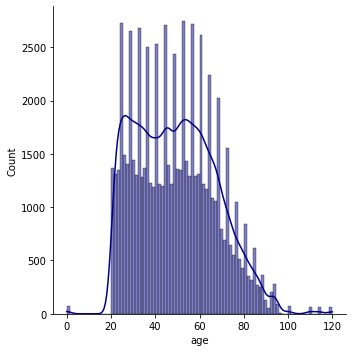

In [10]:
# Density Plot and Histogram of all arrival delays
sns.displot(df['age'], kde=True, color = 'darkblue')

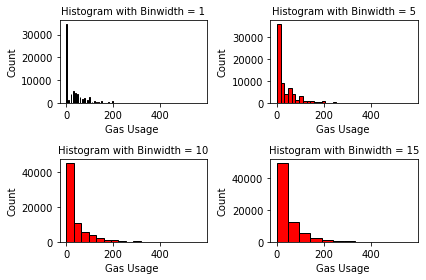

In [11]:
for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(df['gas_usage'], bins = int(180/binwidth),
             color = 'red', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 10)
    ax.set_xlabel('Gas Usage ', size = 10)
    ax.set_ylabel('Count', size= 10)

plt.tight_layout()
plt.show()

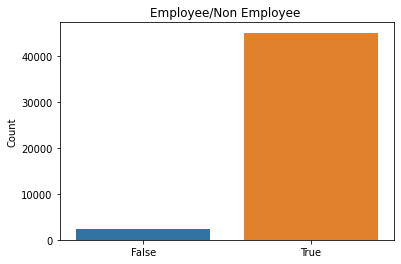

In [12]:
sns.barplot(x=df['is_employed'].value_counts().index,y=df['is_employed'].value_counts().values)
plt.title('Employee/Non Employee ')
plt.ylabel('Count')
#plt.legend(loc=0)
plt.show()

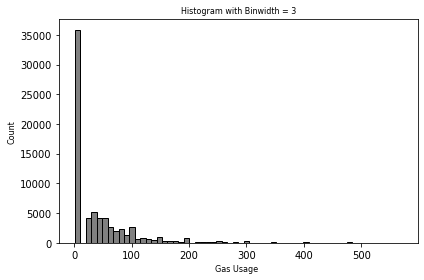

In [13]:

binwidth=3   
# Set up the plot
ax = plt.subplot()

# Draw the plot
ax.hist(df['gas_usage'], bins = int(180/binwidth),
         color = 'grey', edgecolor = 'black')

# Title and labels
ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 8)
ax.set_xlabel('Gas Usage ', size = 8)
ax.set_ylabel('Count', size= 8)



plt.tight_layout()
plt.show()

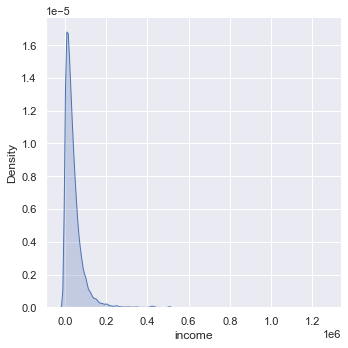

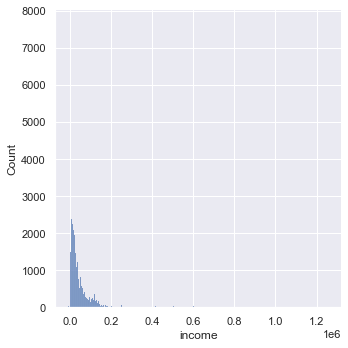

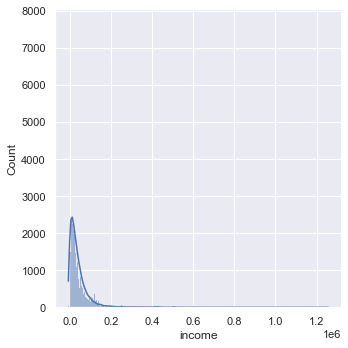

In [14]:
# Density Plot and Histogram of all arrival delays
#sns.displot(df['income'], kind=kde, color = 'blue')
sns.set(font_scale = 1)
sns.displot(df, x=df['income'], kind="kde", fill=True)

sns.displot(df, x=df['income'], kind="hist")


sns.displot(df, x=df['income'], kde=True)



In [53]:
np.log10(1000)

3.0

0       22000.000
1       23200.000
2       21000.000
3       37770.000
4       39000.000
           ...   
73257   18500.000
73258   20800.000
73259   75000.000
73260   22200.000
73261   16400.000
Name: income, Length: 73262, dtype: float64


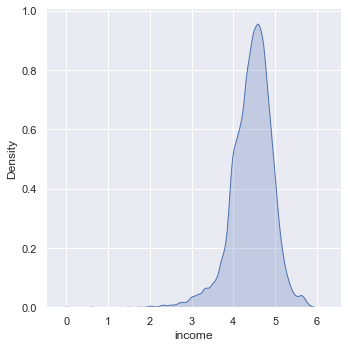

In [52]:

income1=df[df[['income']]>0]['income']
print((income1))
g=sns.displot(df["income"], x=np.log10(income1), kind="kde", fill=True)


#xlabels = ['{:,.2f}'.format(x) + 'K' for x in g.get_xticks()/1000]
#g.set_xticklabels(xlabels)


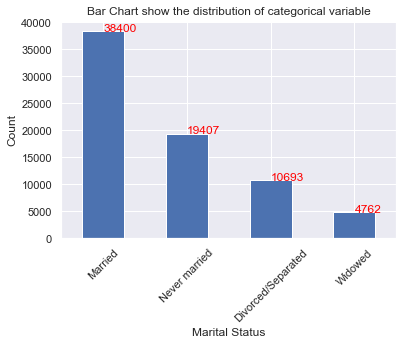

In [16]:
#Let's see how many examples we have of each target variable (each specie)
df['marital_status'].value_counts().plot(kind='bar')

#Add count over the bar
ax=df['marital_status'].value_counts().plot.bar(width=.5)
for i, v in df['marital_status'].value_counts().reset_index().iterrows():
    ax.text(i, v.marital_status + 0.3, v.marital_status, color='red')
    
plt.xticks(rotation=45) #Rotate xticks
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Bar Chart show the distribution of categorical variable')
plt.show()

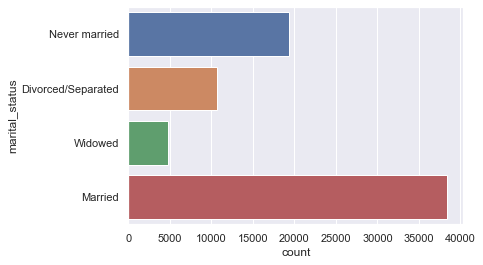

In [17]:
p = sns.countplot(data=df,
                  y = 'marital_status',
               )

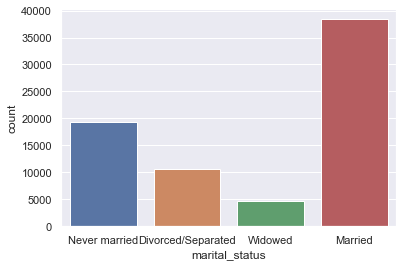

In [18]:
p = sns.countplot(data=df,
                 x = 'marital_status',
               )

In [19]:
df['marital_status'].value_counts()

Married               38400
Never married         19407
Divorced/Separated    10693
Widowed                4762
Name: marital_status, dtype: int64

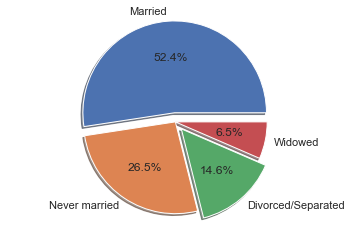

In [20]:
# pie chart for marital status
labels = ['Married','Never married','Divorced/Separated' ,'Widowed']

sizes = [df['marital_status'].value_counts()[0],
         df['marital_status'].value_counts()[1],
         df['marital_status'].value_counts()[2],
         df['marital_status'].value_counts()[3]
        ]
explode=[0.1,0,0.1,0]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)
ax1.axis('equal')
plt.show()

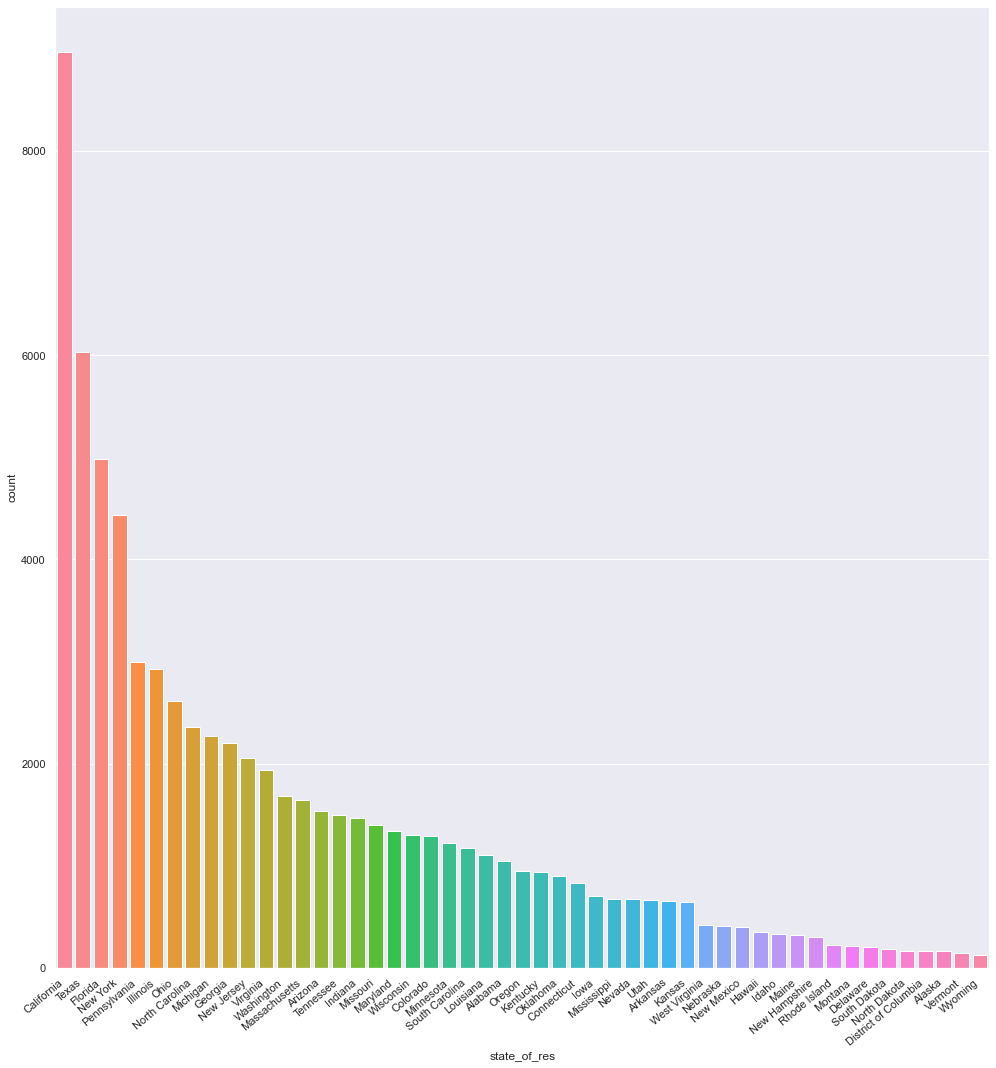

In [21]:
fig=plt.figure(figsize=(14,15)) # this creates a figure 10 inch wide, 15 inch high
#num_categories = df.state_of_res.unique().size
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax = sns.countplot(data=df,
                  x = 'state_of_res',   
                  saturation=1,
                  order = df['state_of_res'].value_counts().index
                  #xerr=8*np.arange(num_categories)
               )
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='age', ylabel='income'>

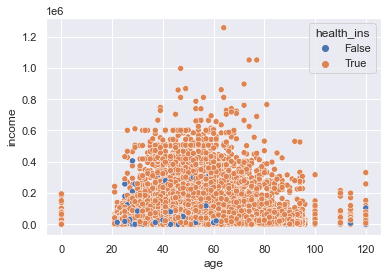

In [22]:
sns.scatterplot(data=df, x="age", y="income", hue="health_ins")

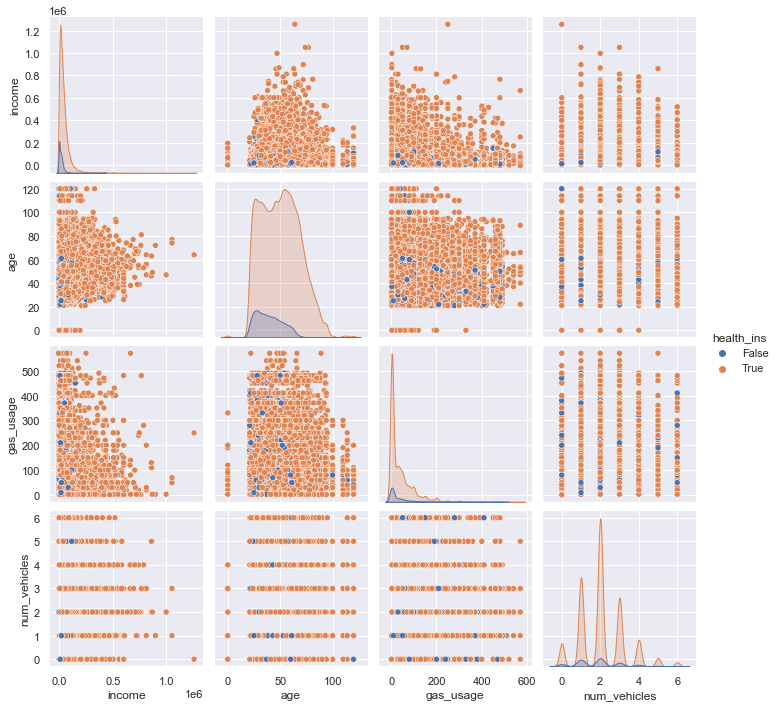

In [23]:
sns.pairplot(data=df, vars=["income","age","gas_usage","num_vehicles"], hue="health_ins")

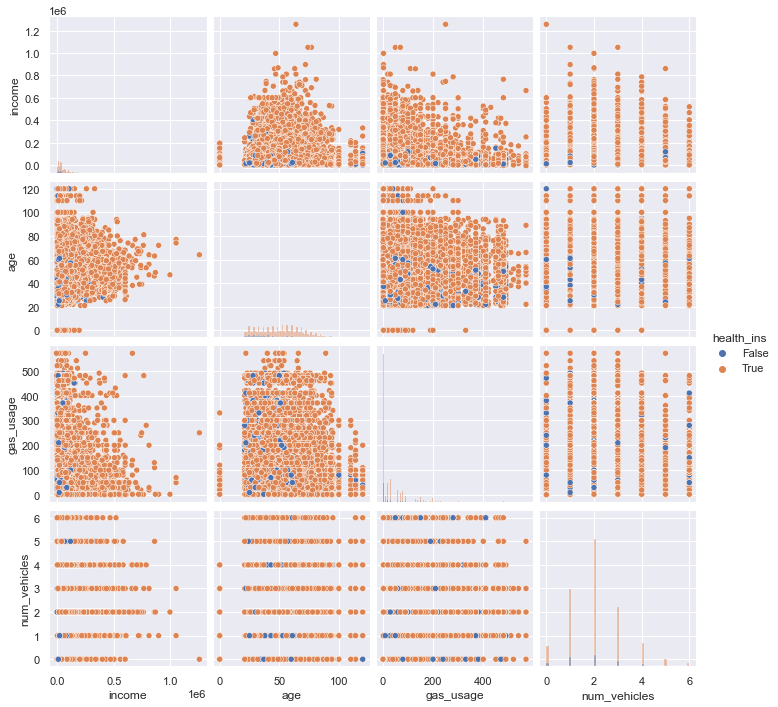

In [24]:
sns.pairplot(data=df, vars=["income","age","gas_usage","num_vehicles"], hue="health_ins",diag_kind="hist")

Reference:

Practical Data Science with R 
Nina Zumel and John Mount

<AxesSubplot:xlabel='health_ins', ylabel='age'>

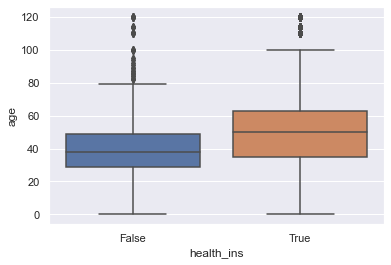

In [25]:
sns.boxplot(x="health_ins", y="age", data=df)

<AxesSubplot:>

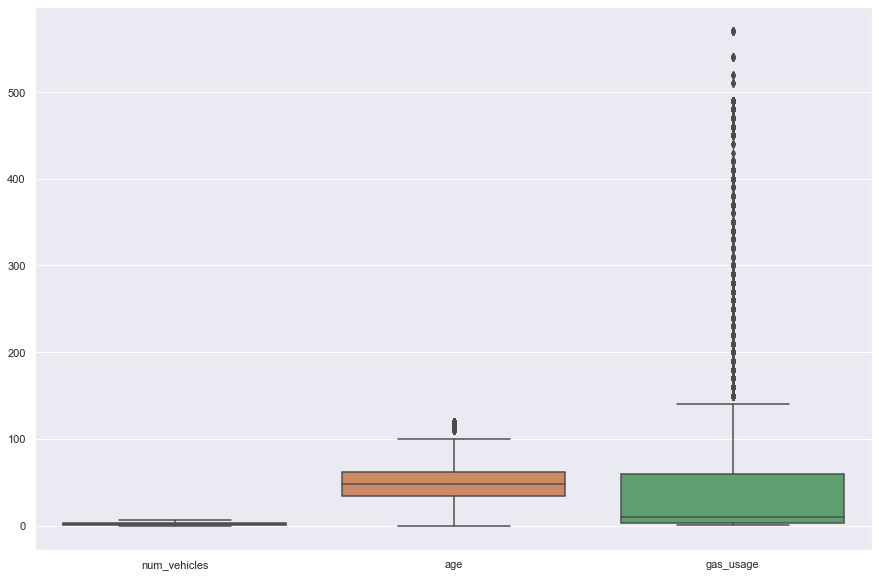

In [26]:
fig=plt.figure(figsize=(15,10))

without_income_df = df.drop(['income', 'is_employed', 'health_ins', 'recent_move'], axis=1)
 

sns.boxplot(data=without_income_df)
#sns.boxplot(data=df)